importing Jupyter notebook from intro.ipynb
Total return:  0.04777517423943911


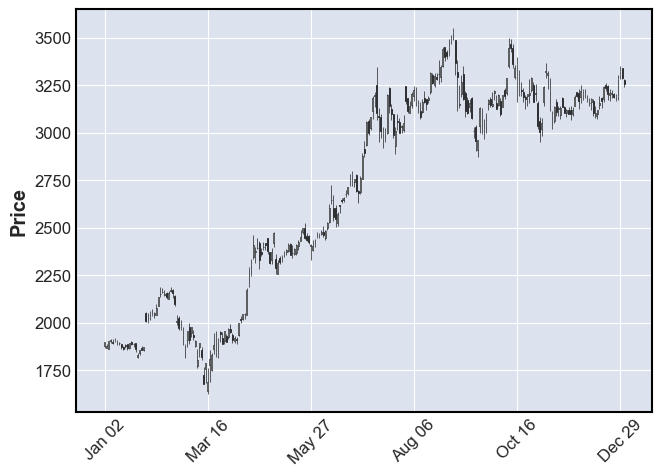

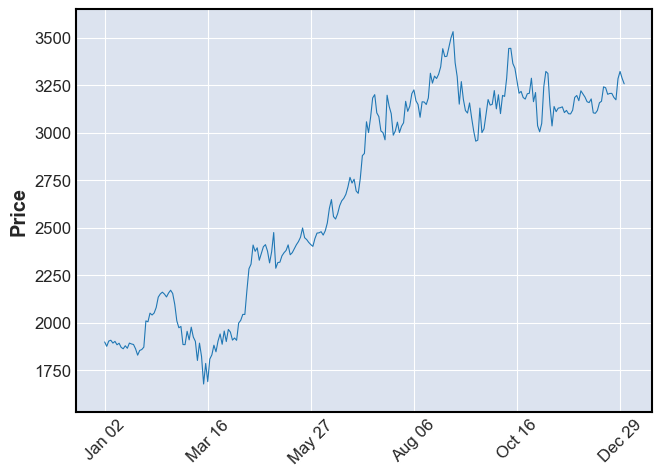

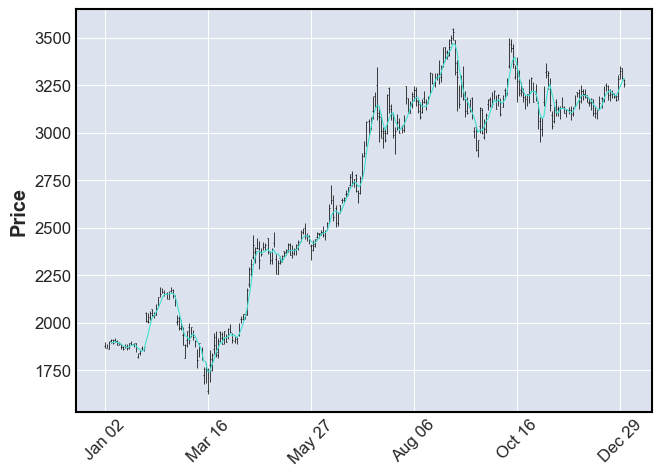

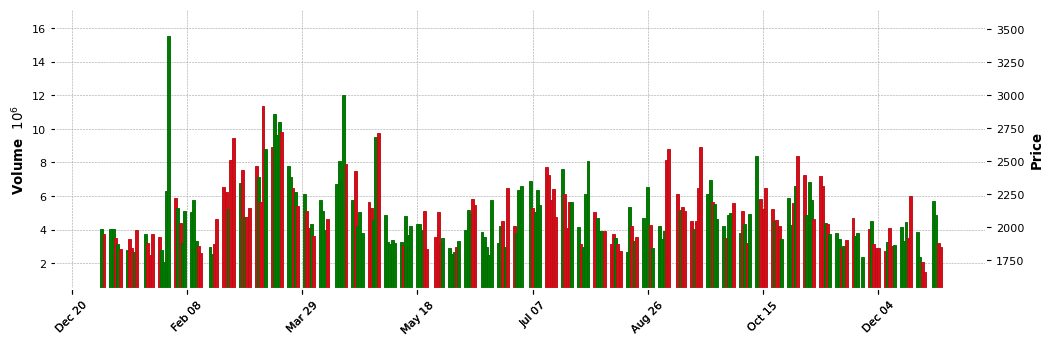

In [4]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance
# pip install import-ipynb
import import_ipynb
from intro import save_to_csv_from_yahoo

# Simple price plot

In [5]:
# Creates a simple price / date plot between dates
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv(ticker + ".csv")
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]
        
        # Get date from the 1st
        date_arr = df_np[:,1]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        # add_axes([left, bottom, width, height])
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#FAEBD7')

# Download Multiple Stocks

In [6]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

# Merge multiple stocks in one DF by column name

In [7]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers ):
    mult_df = pd.DataFrame()
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
    return mult_df

# Get changing value of investment using multiple stocks

In [8]:
def plot_return_mult_stocks(investment, stock_df): #ROI 
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

# Get Standard Deviation for Multiple Stocks




In [9]:
# Receives the dataframe with the Adj Close data along with the stock ticker
# Returns the mean and standard deviation associated with the ticker
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [10]:
# Receives the dataframe with the stock ticker as the column name and
# the Adj Close values as the column data and returns the mean and 
# standard deviation
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

# TESTS

Stock: AAPL Mean:  117.49 Standard deviation: 29.69
Coefficient of Variation: 0.2526674900677737

Stock: GOOG Mean: 1994.99 Standard deviation: 589.93
Coefficient of Variation: 0.29570407944687055

Stock: IBM  Mean:  118.16 Standard deviation: 11.74
Coefficient of Variation: 0.09934031468408291



,AAPL,GOOG,IBM
Date,,,
2020-01-02,73.988464,1367.369995,117.120605
2020-01-03,73.269150,1360.660034,116.186554
2020-01-06,73.852974,1394.209961,115.978973
2020-01-07,73.505661,1393.339966,116.056801
2020-01-08,74.688072,1404.319946,117.025467
...,...,...,...
2021-12-27,180.330002,2961.280029,131.619995
2021-12-28,179.289993,2928.959961,132.630005
2021-12-29,179.380005,2930.090088,133.350006


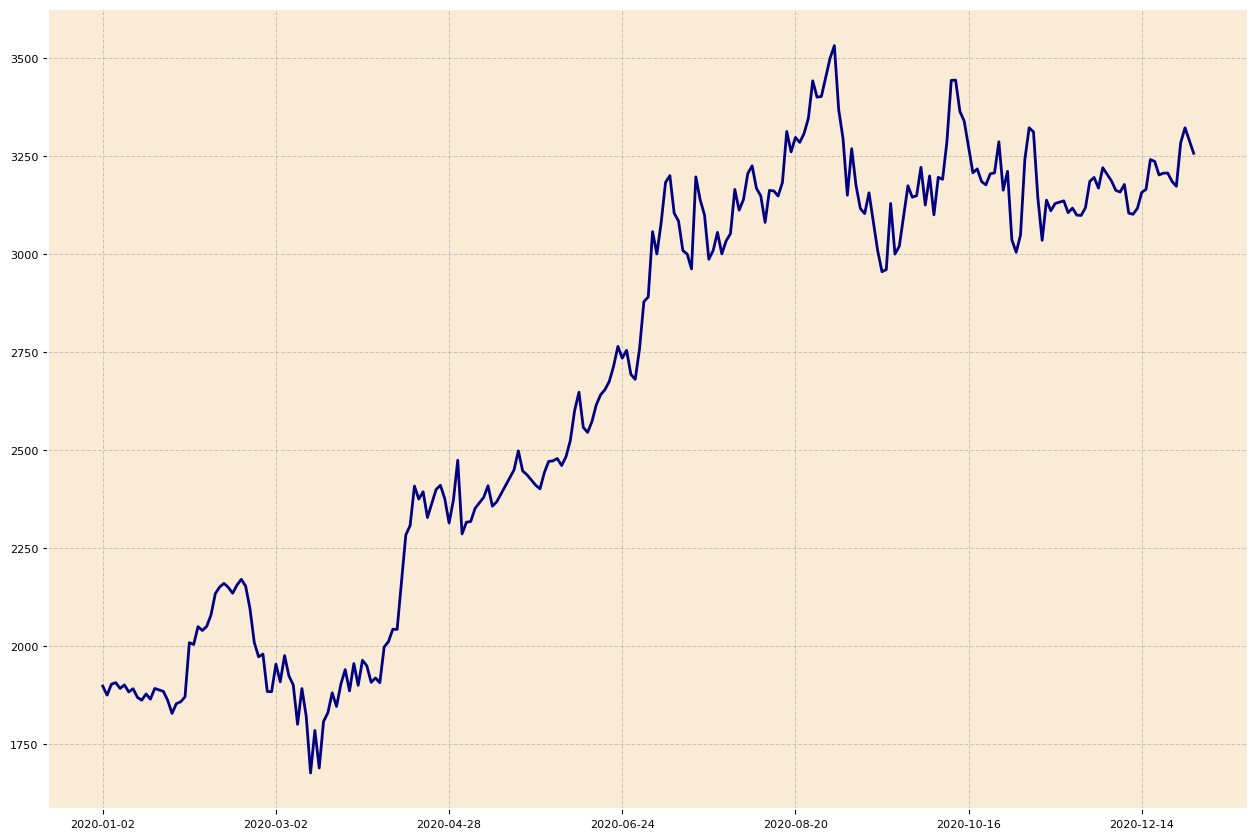

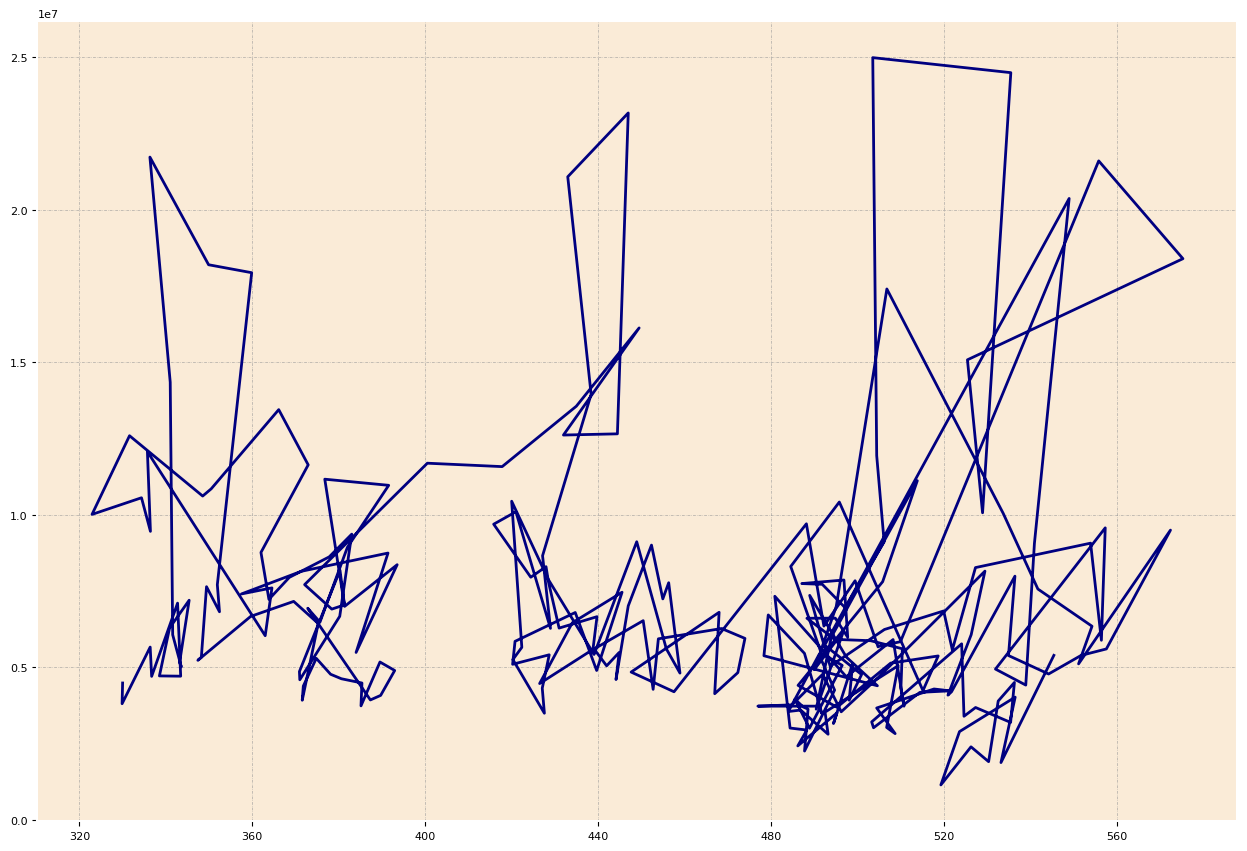

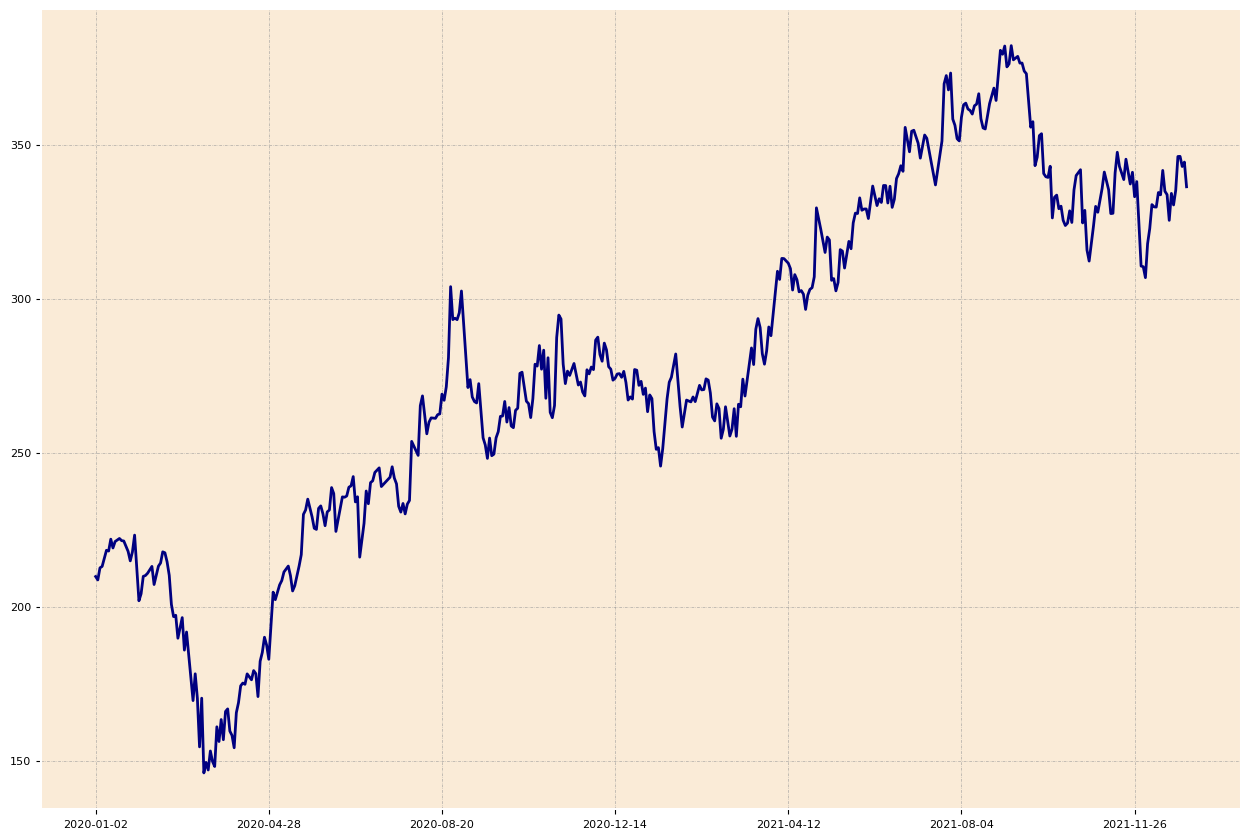

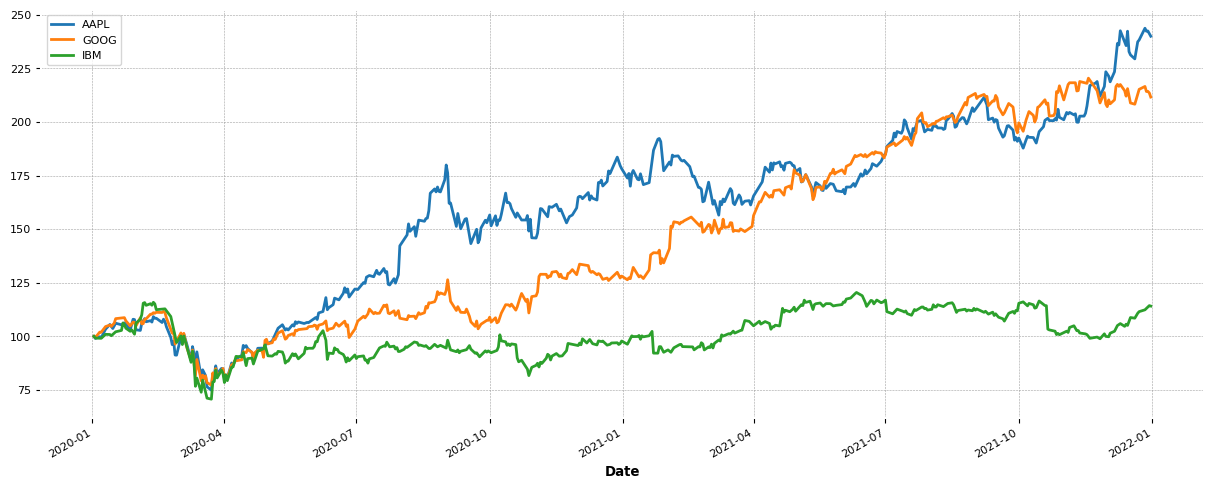

In [11]:
price_plot('AMZN', 2020, 1, 1, 2022, 1, 1)
price_plot('NFLX', 2020, 1 , 1, 2021, 1, 1)
price_plot('FB', 2020, 1 , 1, 2022, 1, 1)

tickers = ['AAPL',"GOOG",'IBM']

download_multiple_stocks(2020, 1 , 1, 2022, 1, 1, *tickers)
mult_df = merge_df_by_column_name('Adj Close', 2020, 1 , 1, 2022, 1, 1, *tickers)
plot_return_mult_stocks(100, mult_df)
get_mult_stock_mean_sd(mult_df)
mult_df